In [1]:
import pandas as pd

import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
PATH_DATA = os.getenv("PATH_DATA")

df = pd.read_csv(f"{PATH_DATA}/earthquake_data.csv")
df

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,"M 7.7 - 28 km SSW of Puerto El Triunfo, El Sal...",7.7,13-01-2001 17:33,0,8,NaN,0,912,us,427,0.000,0.0,mwc,60.000,13.0490,-88.660,"Puerto El Triunfo, El Salvador",NaN,NaN
778,"M 6.9 - 47 km S of Old Harbor, Alaska",6.9,10-01-2001 16:02,5,7,NaN,0,745,ak,0,0.000,0.0,mw,36.400,56.7744,-153.281,"Old Harbor, Alaska",North America,NaN
779,"M 7.1 - 16 km NE of Port-Olry, Vanuatu",7.1,09-01-2001 16:49,0,7,NaN,0,776,us,372,0.000,0.0,mwb,103.000,-14.9280,167.170,"Port-Olry, Vanuatu",NaN,Vanuatu
780,"M 6.8 - Mindanao, Philippines",6.8,01-01-2001 08:54,0,5,NaN,0,711,us,64,0.000,0.0,mwc,33.000,6.6310,126.899,"Mindanao, Philippines",NaN,NaN


## Nettoyage et normalisation des données

**Procédure :**
1. Chargement des données brutes.
2. Suppression des colonnes inutiles : `title`, `date_time`, `net`, `magType`, et toutes les colonnes géographiques (`latitude`, `longitude`, `depth`, `place`, `locationSource`, etc.).
3. Création de deux jeux de données :
   - Pour la prédiction de `alert` : suppression des lignes où `alert` est manquant.
   - Pour la prédiction de `sig` : suppression de la colonne `alert`.
4. Normalisation standard (moyenne=0, écart-type=1) des colonnes numériques.
5. Export des jeux de données nettoyés dans le dossier `data/`.
6. Documentation et conservation du lineage.

In [12]:
# Liste des colonnes à supprimer (inutiles ou géographiques)
colonnes_a_supprimer = [
    'title', 'date_time', 'net', 'magType', 'latitude', 'longitude', 'location', 'continent', 'country'
]

# On retire les colonnes si elles existent
df_clean = df.drop(columns=[col for col in colonnes_a_supprimer if col in df.columns])
df_clean.head()

,magnitude,cdi,mmi,alert,tsunami,sig,nst,dmin,gap,depth
0,7.0,8,7,green,1,768,117,0.509,17.0,14.000
1,6.9,4,4,green,0,735,99,2.229,34.0,25.000
2,7.0,3,3,green,1,755,147,3.125,18.0,579.000
3,7.3,5,5,green,1,833,149,1.865,21.0,37.000
4,6.6,0,2,green,1,670,131,4.998,27.0,624.464


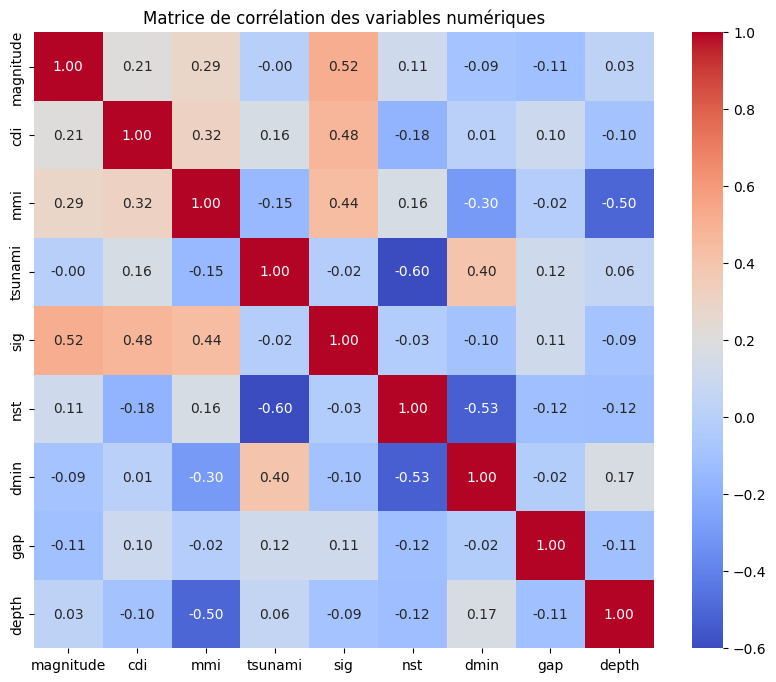

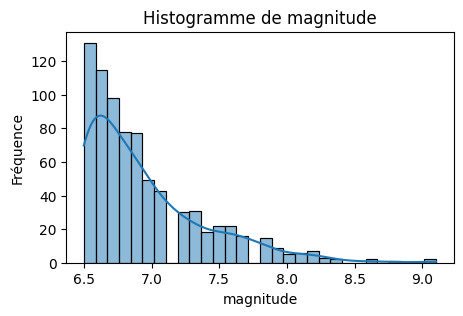

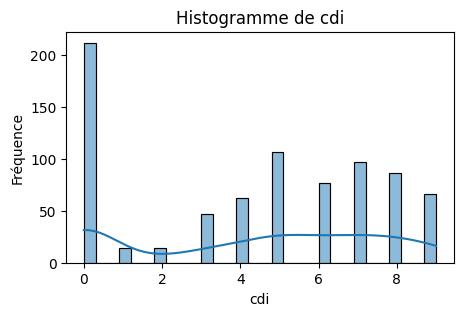

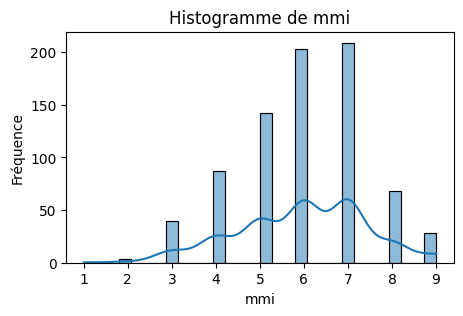

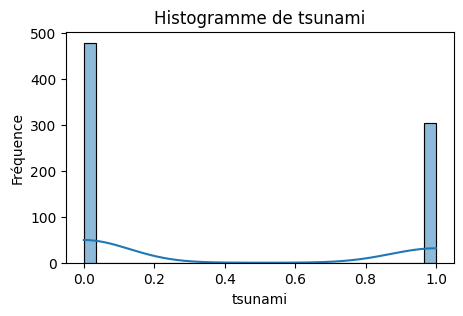

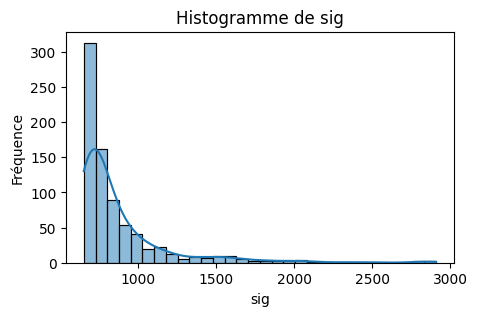

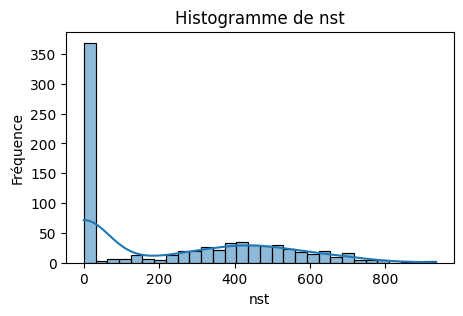

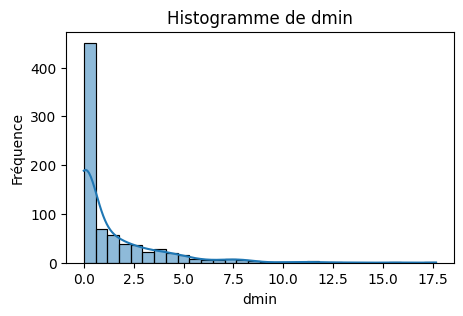

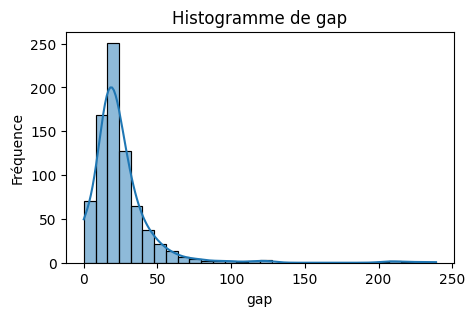

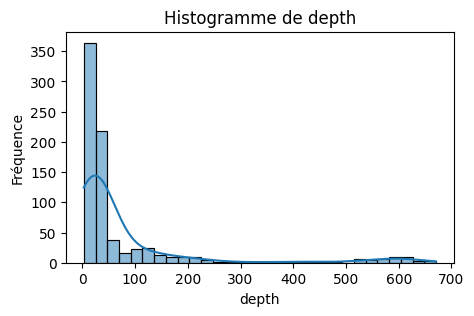

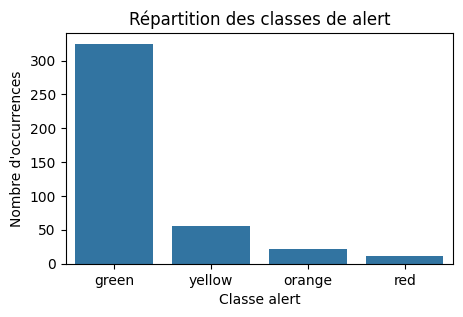

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des colonnes numériques
colonnes_num = df_clean.select_dtypes(include=['float64', 'int64']).columns

# Heatmap de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean[colonnes_num].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation des variables numériques')
plt.show()

# Histogrammes des principales variables numériques
for col in colonnes_num:
    plt.figure(figsize=(5, 3))
    sns.histplot(df_clean[col], kde=True, bins=30)
    plt.title(f'Histogramme de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()

# Répartition des classes de la variable alert (si présente)
if 'alert' in df_clean.columns:
    plt.figure(figsize=(5, 3))
    sns.countplot(x='alert', data=df_clean)
    plt.title('Répartition des classes de alert')
    plt.xlabel('Classe alert')
    plt.ylabel('Nombre d\'occurrences')
    plt.show()

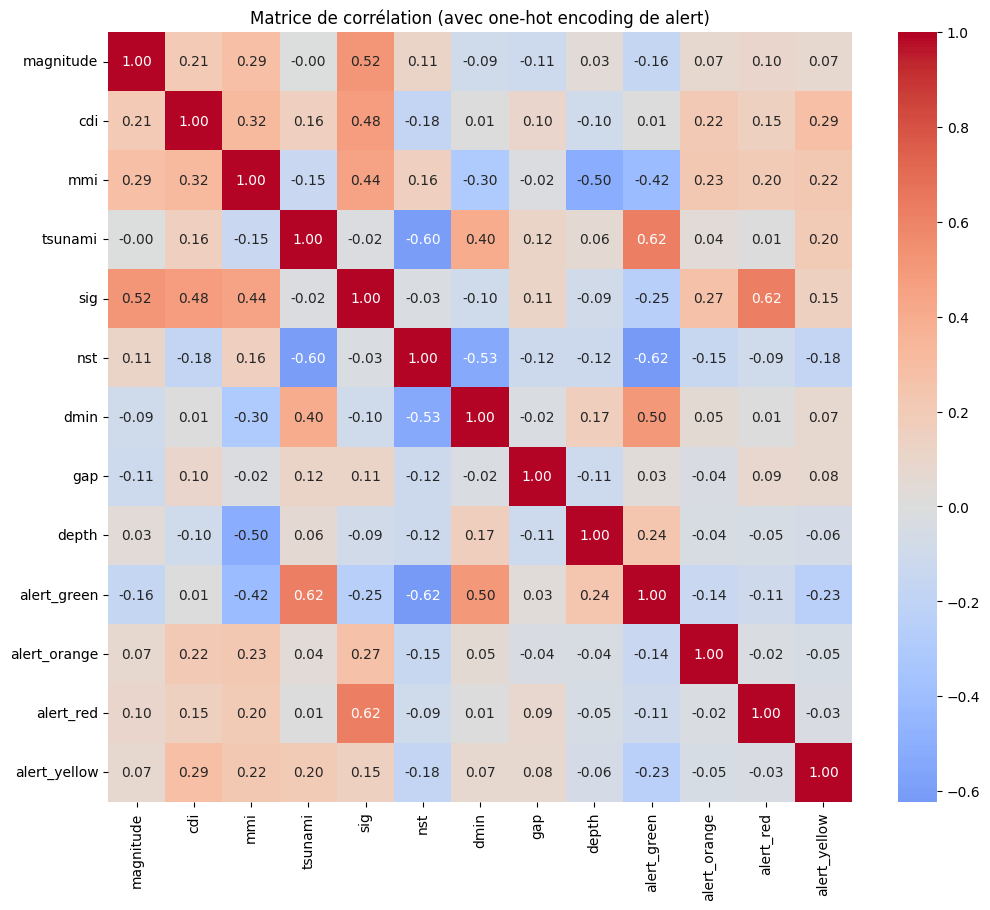

In [29]:
# Heatmap de corrélation avec one-hot encoding de alert
if 'alert' in df_clean.columns:
    df_onehot = pd.get_dummies(df_clean, columns=['alert'])
    plt.figure(figsize=(12, 10))
    sns.heatmap(df_onehot.corr(), cmap='coolwarm', center=0, annot=True, fmt='.2f')
    plt.title('Matrice de corrélation (avec one-hot encoding de alert)')
    plt.show()

In [13]:
# Jeu de données pour la prédiction de 'alert'
df_alert = df_clean.dropna(subset=['alert'])

# Jeu de données pour la prédiction de 'sig'
df_sig = df_clean.drop(columns=['alert']) if 'alert' in df_clean.columns else df_clean.copy()

df_alert.head(), df_sig.head()

(   magnitude  cdi  mmi  alert  tsunami  sig  nst   dmin   gap    depth
 0        7.0    8    7  green        1  768  117  0.509  17.0   14.000
 1        6.9    4    4  green        0  735   99  2.229  34.0   25.000
 2        7.0    3    3  green        1  755  147  3.125  18.0  579.000
 3        7.3    5    5  green        1  833  149  1.865  21.0   37.000
 4        6.6    0    2  green        1  670  131  4.998  27.0  624.464,
    magnitude  cdi  mmi  tsunami  sig  nst   dmin   gap    depth
 0        7.0    8    7        1  768  117  0.509  17.0   14.000
 1        6.9    4    4        0  735   99  2.229  34.0   25.000
 2        7.0    3    3        1  755  147  3.125  18.0  579.000
 3        7.3    5    5        1  833  149  1.865  21.0   37.000
 4        6.6    0    2        1  670  131  4.998  27.0  624.464)

In [14]:
from sklearn.preprocessing import StandardScaler

# Normalisation des colonnes numériques pour df_alert
colonnes_numeriques_alert = df_alert.select_dtypes(include=['float64', 'int64']).columns
scaler_alert = StandardScaler()
df_alert[colonnes_numeriques_alert] = scaler_alert.fit_transform(df_alert[colonnes_numeriques_alert])

# Normalisation des colonnes numériques pour df_sig
colonnes_numeriques_sig = df_sig.select_dtypes(include=['float64', 'int64']).columns
scaler_sig = StandardScaler()
df_sig[colonnes_numeriques_sig] = scaler_sig.fit_transform(df_sig[colonnes_numeriques_sig])

/tmp/ipykernel_3649/564922623.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alert[colonnes_numeriques_alert] = scaler_alert.fit_transform(df_alert[colonnes_numeriques_alert])


In [15]:
df_alert

,magnitude,cdi,mmi,alert,tsunami,sig,nst,dmin,gap,depth
0,0.214891,0.962716,0.799014,green,0.622864,-0.329588,0.510171,-0.779841,-0.404019,-0.498475
1,-0.023558,-0.380232,-1.085024,green,-1.605486,-0.417479,0.379569,-0.098906,0.301586,-0.433565
2,0.214891,-0.715969,-1.713037,green,0.622864,-0.364212,0.727842,0.255814,-0.362513,2.835505
3,0.930235,-0.044495,-0.457012,green,0.622864,-0.156470,0.742353,-0.243011,-0.237994,-0.362755
4,-0.738902,-1.723180,-2.341050,green,0.622864,-0.590597,0.611751,0.997321,0.011043,3.103781
...,...,...,...,...,...,...,...,...,...,...
416,-0.262006,0.291242,0.799014,green,-1.605486,-0.321598,3.985646,-0.981351,-0.308555,-0.315548
423,1.168683,0.962716,0.799014,yellow,-1.605486,1.500134,5.110278,-0.981351,-0.051217,-0.439466
440,3.076268,1.298453,0.171001,green,-1.605486,0.855603,2.135446,-0.981351,-0.491182,-0.432975
441,4.030060,1.298453,0.799014,yellow,-1.605486,3.079502,3.281845,-0.981351,-0.420622,-0.463070


In [16]:
df_sig

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth
0,0.132235,1.157305,0.708588,1.253941,-0.316853,-0.452952,-0.368342,-0.332058,-0.451079
1,-0.092369,-0.105356,-1.343693,-0.797486,-0.419255,-0.524943,0.407346,0.370143,-0.370898
2,0.132235,-0.421022,-2.027786,1.253941,-0.357193,-0.332965,0.811425,-0.290752,3.667319
3,0.806045,0.210309,-0.659599,1.253941,-0.115152,-0.324966,0.243189,-0.166834,-0.283427
4,-0.766179,-1.368018,-2.711880,1.253941,-0.620956,-0.396958,1.656114,0.081001,3.998715
...,...,...,...,...,...,...,...,...,...
777,1.704459,-1.368018,1.392681,-0.797486,0.129993,0.786909,-0.597892,-1.034260,-0.115776
778,-0.092369,0.210309,0.708588,-0.797486,-0.388224,-0.920899,-0.597892,-1.034260,-0.287801
779,0.356838,-1.368018,0.708588,-0.797486,-0.292028,0.566934,-0.597892,-1.034260,0.197660
780,-0.316972,-1.368018,-0.659599,-0.797486,-0.493729,-0.664928,-0.597892,-1.034260,-0.312584


In [17]:
# Export des jeux de données nettoyés
chemin_alert = os.path.join(PATH_DATA, 'earthquake_data_clean_alert.csv')
chemin_sig = os.path.join(PATH_DATA, 'earthquake_data_clean_sig.csv')
df_alert.to_csv(chemin_alert, index=False)
df_sig.to_csv(chemin_sig, index=False)
print(f"Export effectué :\n- {chemin_alert}\n- {chemin_sig}")

Export effectué :
- /home/camille/code/Camille9999/EPSI/M2/EPSI_atelier-info-doc_projet/data/earthquake_data_clean_alert.csv
- /home/camille/code/Camille9999/EPSI/M2/EPSI_atelier-info-doc_projet/data/earthquake_data_clean_sig.csv


### Lineage et documentation

- Source : earthquake_data.csv
- Colonnes supprimées : inutiles et géographiques (voir code ci-dessus)
- Normalisation : StandardScaler (moyenne=0, écart-type=1) appliquée sur les colonnes numériques
- Jeu de données pour 'alert' : lignes avec alert manquant supprimées
- Jeu de données pour 'sig' : colonne alert supprimée
- Export : earthquake_data_clean_alert.csv et earthquake_data_clean_sig.csv dans le dossier data/
- Date de traitement : 09/01/2026

## Entraînement des modèles

- Prédiction de `alert` (catégorielle) : modèle de régression logistique (LogisticRegression)
- Prédiction de `sig` (numérique) : modèle de forêt aléatoire (RandomForestRegressor)

Une recherche simple d'hyperparamètres sera réalisée pour chaque modèle.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error
import joblib

# Chargement des datasets nettoyés
chemin_alert = os.path.join(PATH_DATA, 'earthquake_data_clean_alert.csv')
df_alert = pd.read_csv(chemin_alert)

chemin_sig = os.path.join(PATH_DATA, 'earthquake_data_clean_sig.csv')
df_sig = pd.read_csv(chemin_sig)

In [20]:
# --- Prédiction de 'alert' ---
X_alert = df_alert.drop(columns=['alert'])
y_alert = df_alert['alert']
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_alert, y_alert, test_size=0.2, random_state=42, stratify=y_alert)

# Recherche simple d'hyperparamètres pour LogisticRegression
param_grid_lr = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
lr = LogisticRegression(max_iter=200)
gs_lr = GridSearchCV(lr, param_grid_lr, cv=3)
gs_lr.fit(X_train_a, y_train_a)
y_pred_a = gs_lr.predict(X_test_a)
print('Classification report (alert):\n', classification_report(y_test_a, y_pred_a))

# Sauvegarde du modèle
joblib.dump(gs_lr.best_estimator_, os.path.join(PATH_DATA, 'model_alert_logreg.joblib'))

/home/camille/.pyenv/versions/EPSI_atelier-info-doc_projet/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:490: FitFailedWarning: 
9 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/home/camille/.pyenv/versions/EPSI_atelier-info-doc_projet/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/camille/.pyenv/versions/EPSI_atelier-info-doc_projet/lib/python3.12/site-packages/sklearn/base.py", line 1336, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^

Classification report (alert):
               precision    recall  f1-score   support

       green       0.91      0.98      0.95        65
      orange       0.71      1.00      0.83         5
         red       1.00      1.00      1.00         2
      yellow       1.00      0.36      0.53        11

    accuracy                           0.90        83
   macro avg       0.91      0.84      0.83        83
weighted avg       0.92      0.90      0.89        83



['/home/camille/code/Camille9999/EPSI/M2/EPSI_atelier-info-doc_projet/data/model_alert_logreg.joblib']

In [21]:
# --- Prédiction de 'sig' ---
X_sig = df_sig.drop(columns=['sig'])
y_sig = df_sig['sig']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sig, y_sig, test_size=0.2, random_state=42)

# Recherche simple d'hyperparamètres pour RandomForestRegressor
param_grid_rf = {'n_estimators': [50, 100], 'max_depth': [3, 5, None]}
rf = RandomForestRegressor(random_state=42)
gs_rf = GridSearchCV(rf, param_grid_rf, cv=3)
gs_rf.fit(X_train_s, y_train_s)
y_pred_s = gs_rf.predict(X_test_s)
print('MSE (sig):', mean_squared_error(y_test_s, y_pred_s))

# Sauvegarde du modèle
joblib.dump(gs_rf.best_estimator_, os.path.join(PATH_DATA, 'model_sig_rf.joblib'))

MSE (sig): 0.6083529170083568


['/home/camille/code/Camille9999/EPSI/M2/EPSI_atelier-info-doc_projet/data/model_sig_rf.joblib']

In [22]:
# Récapitulatif pour Model Cards
model_card_info = {}

# Prétraitement des données
model_card_info['preprocessing'] = {
    'colonnes_supprimees': colonnes_a_supprimer,
    'normalisation': 'StandardScaler (moyenne=0, écart-type=1) sur colonnes numériques',
    'jeu_alert': {
        'lignes_initiales': len(df),
        'lignes_apres_suppression_alert_nan': len(df_alert)
    },
    'jeu_sig': {
        'colonnes': list(df_sig.columns)
    },
    'date_traitement': '09/01/2026'
}

# Modèle alert
model_card_info['alert'] = {
    'modele': 'LogisticRegression',
    'hyperparametres': gs_lr.best_params_,
    'meilleur_score_cv': gs_lr.best_score_,
    'classification_report': classification_report(y_test_a, y_pred_a, output_dict=True)
}

# Modèle sig
model_card_info['sig'] = {
    'modele': 'RandomForestRegressor',
    'hyperparametres': gs_rf.best_params_,
    'meilleur_score_cv': gs_rf.best_score_,
    'mse_test': mean_squared_error(y_test_s, y_pred_s)
}

import pprint
pprint.pprint(model_card_info)

{'alert': {'classification_report': {'accuracy': 0.9036144578313253,
                                     'green': {'f1-score': 0.9481481481481482,
                                               'precision': 0.9142857142857143,
                                               'recall': 0.9846153846153847,
                                               'support': 65.0},
                                     'macro avg': {'f1-score': 0.8287037037037037,
                                                   'precision': 0.9071428571428571,
                                                   'recall': 0.8370629370629371,
                                                   'support': 83.0},
                                     'orange': {'f1-score': 0.8333333333333334,
                                                'precision': 0.7142857142857143,
                                                'recall': 1.0,
                                                'support': 5.0},
                        

In [24]:
# Génération du texte complet pour la model card alert
from pprint import pformat

lignes_init = len(df)
lignes_alert = len(df_alert)
params_alert = gs_lr.best_params_
score_alert = gs_lr.best_score_
report_alert = pformat(classification_report(y_test_a, y_pred_a))

model_card_alert = f"""
# Model Card: Prédiction de l'alerte (alert)

**Date de développement :** 09/01/2026

**Modèle :** Régression Logistique (LogisticRegression)

**Données utilisées :**
- Fichier : data/earthquake_data_clean_alert.csv
- Cible : alert (catégorielle)

**Prétraitement des données :**
- Suppression des colonnes inutiles ('title', 'date_time', 'net', 'magType', 'latitude', 'longitude', 'location', 'continent', 'country')
- Normalisation : StandardScaler (moyenne=0, écart-type=1) sur colonnes numériques
- Lignes initiales : {lignes_init}
- Lignes après suppression des valeurs manquantes sur `alert` : {lignes_alert}
- Export : earthquake_data_clean_alert.csv

**Architecture :**
- LogisticRegression (scikit-learn)

**Recherche d'hyperparamètres (GridSearchCV) :**
- Grille testée :
  - C : [0.1, 1, 10]
  - solver : ['liblinear', 'lbfgs']
- Meilleurs paramètres :
  - {params_alert}
- Résultats du gridsearch : {score_alert:.3f}

**Résultats sur le test :**
- Classification report :
```
{report_alert}
```

**Export du modèle :**
- data/model_alert_logreg.joblib
"""

print(model_card_alert)


# Model Card: Prédiction de l'alerte (alert)

**Date de développement :** 09/01/2026

**Modèle :** Régression Logistique (LogisticRegression)

**Données utilisées :**
- Fichier : data/earthquake_data_clean_alert.csv
- Cible : alert (catégorielle)

**Prétraitement des données :**
- Suppression des colonnes inutiles ('title', 'date_time', 'net', 'magType', 'latitude', 'longitude', 'location', 'continent', 'country')
- Normalisation : StandardScaler (moyenne=0, écart-type=1) sur colonnes numériques
- Lignes initiales : 782
- Lignes après suppression des valeurs manquantes sur `alert` : 415
- Export : earthquake_data_clean_alert.csv

**Architecture :**
- LogisticRegression (scikit-learn)

**Recherche d'hyperparamètres (GridSearchCV) :**
- Grille testée :
  - C : [0.1, 1, 10]
  - solver : ['liblinear', 'lbfgs']
- Meilleurs paramètres :
  - {'C': 10, 'solver': 'lbfgs'}
- Résultats du gridsearch : 0.840

**Résultats sur le test :**
- Classification report :
```
('              precision    r

In [25]:
# Génération du texte complet pour la model card sig
colonnes_sig = list(df_sig.columns)
params_sig = gs_rf.best_params_
score_sig = gs_rf.best_score_
mse_sig = mean_squared_error(y_test_s, y_pred_s)

model_card_sig = f"""
# Model Card: Prédiction de l'intensité (sig)

**Date de développement :** 09/01/2026

**Modèle :** Forêt Aléatoire (RandomForestRegressor)

**Données utilisées :**
- Fichier : data/earthquake_data_clean_sig.csv
- Cible : sig (numérique)

**Prétraitement des données :**
- Suppression des colonnes inutiles ('title', 'date_time', 'net', 'magType', 'latitude', 'longitude', 'location', 'continent', 'country')
- Normalisation : StandardScaler (moyenne=0, écart-type=1) sur colonnes numériques
- Colonnes utilisées : {colonnes_sig}
- Export : earthquake_data_clean_sig.csv

**Architecture :**
- RandomForestRegressor (scikit-learn)

**Recherche d'hyperparamètres (GridSearchCV) :**
- Grille testée :
  - n_estimators : [50, 100]
  - max_depth : [3, 5, None]
- Meilleurs paramètres :
  - {params_sig}
- Résultats du gridsearch : {score_sig:.3f}

**Résultats sur le test :**
- MSE : {mse_sig:.3f}

**Export du modèle :**
- data/model_sig_rf.joblib
"""

print(model_card_sig)


# Model Card: Prédiction de l'intensité (sig)

**Date de développement :** 09/01/2026

**Modèle :** Forêt Aléatoire (RandomForestRegressor)

**Données utilisées :**
- Fichier : data/earthquake_data_clean_sig.csv
- Cible : sig (numérique)

**Prétraitement des données :**
- Suppression des colonnes inutiles ('title', 'date_time', 'net', 'magType', 'latitude', 'longitude', 'location', 'continent', 'country')
- Normalisation : StandardScaler (moyenne=0, écart-type=1) sur colonnes numériques
- Colonnes utilisées : ['magnitude', 'cdi', 'mmi', 'tsunami', 'sig', 'nst', 'dmin', 'gap', 'depth']
- Export : earthquake_data_clean_sig.csv

**Architecture :**
- RandomForestRegressor (scikit-learn)

**Recherche d'hyperparamètres (GridSearchCV) :**
- Grille testée :
  - n_estimators : [50, 100]
  - max_depth : [3, 5, None]
- Meilleurs paramètres :
  - {'max_depth': None, 'n_estimators': 50}
- Résultats du gridsearch : 0.417

**Résultats sur le test :**
- MSE : 0.608

**Export du modèle :**
- data/mode